In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\Deets Digital\Python\\08 wind-generation.csv')

In [3]:
df.head()


,Entity,Code,Year,Electricity from wind (TWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


In [4]:
df.tail()

,Entity,Code,Year,Electricity from wind (TWh)
8671,Zimbabwe,ZWE,2017,0.0
8672,Zimbabwe,ZWE,2018,0.0
8673,Zimbabwe,ZWE,2019,0.0
8674,Zimbabwe,ZWE,2020,0.0
8675,Zimbabwe,ZWE,2021,0.0


In [5]:
df.shape

(8676, 4)

In [6]:
df.isnull().sum()

Entity                            0
Code                           1459
Year                              0
Electricity from wind (TWh)       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [36]:
#Total Wind Power Generation By Country

In [17]:
country_wind_total = df.groupby('Entity')['Electricity from wind (TWh)'].sum().reset_index().sort_values(by = 'Electricity from wind (TWh)',ascending=False)
country_wind_total_1 = country_wind_total.head(20)

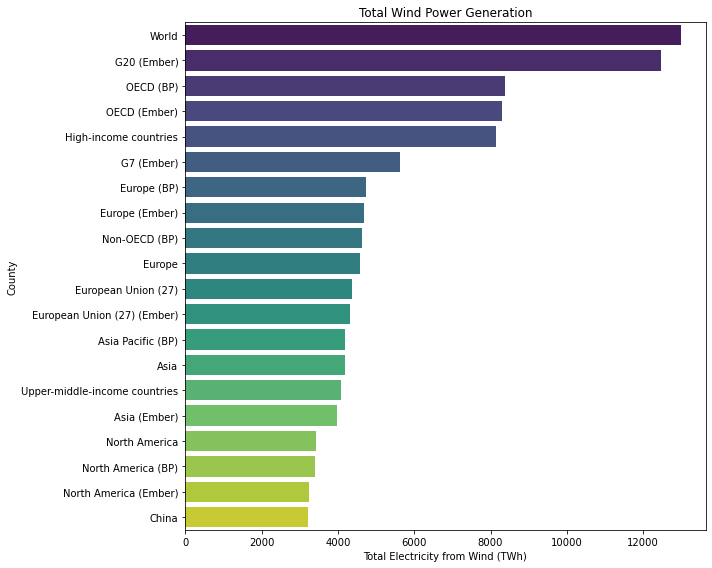

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Electricity from wind (TWh)", y='Entity',data = country_wind_total_1, palette='viridis')
plt.title('Total Wind Power Generation')
plt.xlabel('Total Electricity from Wind (TWh)')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [35]:
#Wind Energy Usage in Turkey in the Last 10 Years

In [22]:
turkey_wind_data = df[df['Entity'] == 'Turkey']
current_year = turkey_wind_data['Year'].max()
last_10_years_wind_data = turkey_wind_data[turkey_wind_data['Year'] > current_year - 10]

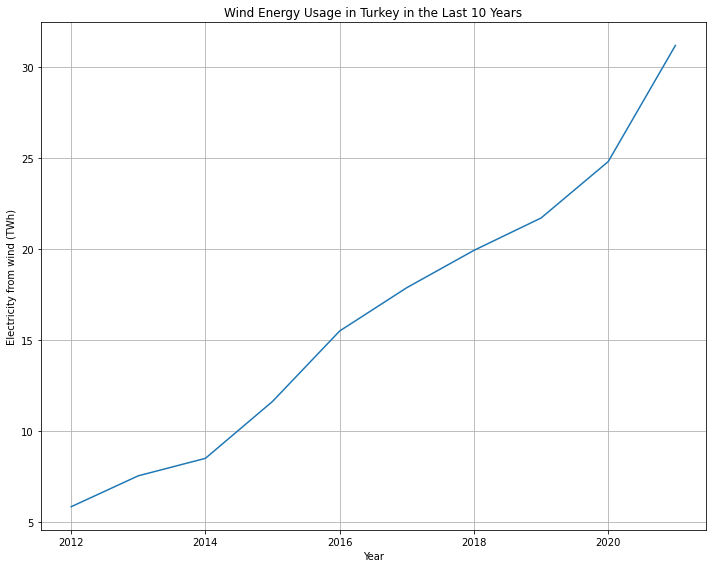

In [27]:
plt.figure(figsize=(10, 8))
sns.lineplot(x="Year", y='Electricity from wind (TWh)',data =last_10_years_wind_data,markers = True)
plt.title('Wind Energy Usage in Turkey in the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Electricity from wind (TWh)')
plt.tight_layout()
plt.grid(True)
plt.show()

In [37]:
# Total Wind Power Production of Specified Countries

In [29]:
specified_countries = ["China", "Canada", "United States", "Brazil", "Russia", "Norway",
                       "Japan", "India", "Sweden", "France", "Italy", "Venezuela",
                       "Austria", "Switzerland", "Spain", "Turkey", "Colombia", "Mexico", "New Zealand", "Paraguay"]

specified_countries_wind_data = df[df['Entity'].isin(specified_countries)]

total_wind_production_specified_countries = specified_countries_wind_data.groupby('Entity')['Electricity from wind (TWh)'].sum().sort_values(ascending=False)

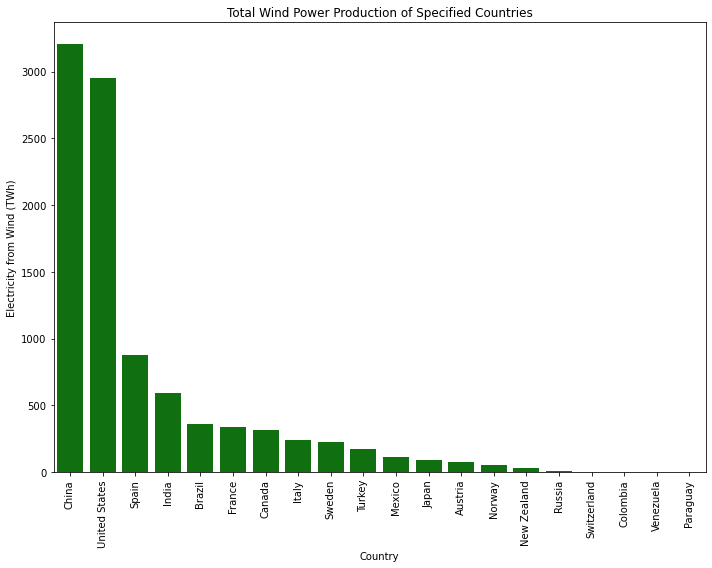

In [32]:
plt.figure(figsize=(10, 8))
sns.barplot(total_wind_production_specified_countries.index, total_wind_production_specified_countries.values, color='green')
plt.title('Total Wind Power Production of Specified Countries')
plt.xlabel('Country')
plt.ylabel('Electricity from Wind (TWh)')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [39]:
# Distribution of Wind Power Generation Over Years

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text major ticklabel objects>)

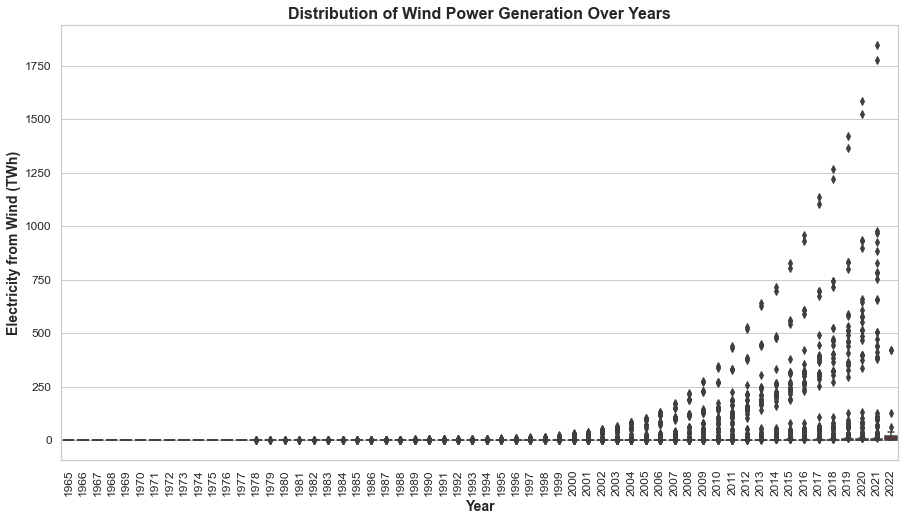

In [38]:
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", n_colors=len(df['Year'].unique()))

plt.figure(figsize=(15, 8))
boxplot = sns.boxplot(data=df, x='Year', y='Electricity from wind (TWh)', palette=palette)

plt.title('Distribution of Wind Power Generation Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Electricity from Wind (TWh)', fontsize=14, fontweight='bold')

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# SOLAR PRODUCTION

In [40]:
df = pd.read_csv('F:\Deets Digital\Python\\13 installed-solar-PV-capacity.csv')

In [41]:
df.head()

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001112
1,Africa,NaN,1997,0.003137
2,Africa,NaN,1998,0.005162
3,Africa,NaN,1999,0.008199
4,Africa,NaN,2000,0.010927


In [42]:
df.tail()

,Entity,Code,Year,Solar Capacity
1654,World,OWID_WRL,2017,390.20653
1655,World,OWID_WRL,2018,483.01180
1656,World,OWID_WRL,2019,584.68570
1657,World,OWID_WRL,2020,710.28110
1658,World,OWID_WRL,2021,843.08606


In [43]:
df.shape

(1659, 4)

In [44]:
df.isnull().sum()

Entity              0
Code              416
Year                0
Solar Capacity      0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [53]:
# Solar Energy Capacity Ranking in Europe in 2021

In [48]:
latest_year_data = df[df['Year']==df['Year'].max()]

european_countries = ['Germany', 'Spain', 'United Kingdom', 'France', 'Italy', 'Sweden', 'Poland', 'Netherlands', 'Turkey']

europe_latest_year = latest_year_data[latest_year_data['Entity'].isin(european_countries)].sort_values(by='Solar Capacity', ascending=False)

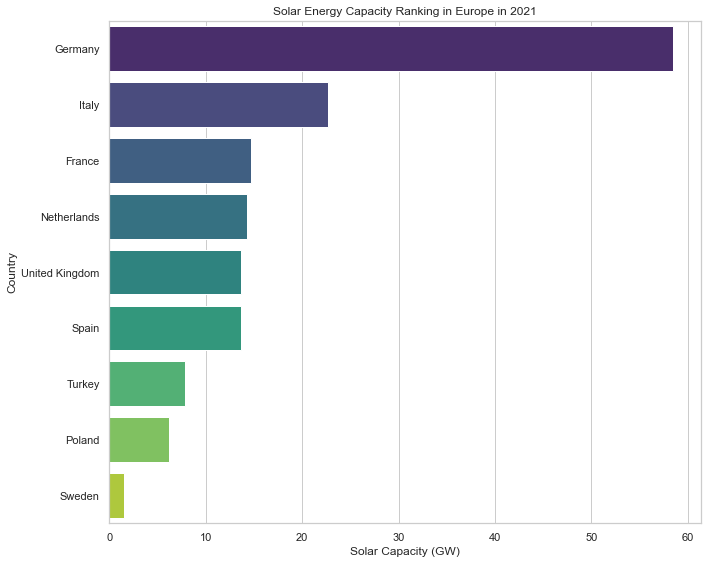

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Solar Capacity", y='Entity',data =europe_latest_year,palette = 'viridis')
plt.title(f'Solar Energy Capacity Ranking in Europe in {df["Year"].max()}')
plt.xlabel('Solar Capacity (GW)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [65]:
# Solar Power Capacity Distribution of Certain Countries in the Last Year

In [54]:
specific_entities = ['Turkey', 'United States', 'Canada', 'China', 'Germany', 'United Kingdom', 'France']
filtered_data = df[df['Entity'].isin(specific_entities) & (df['Year'] == df['Year'].max())]

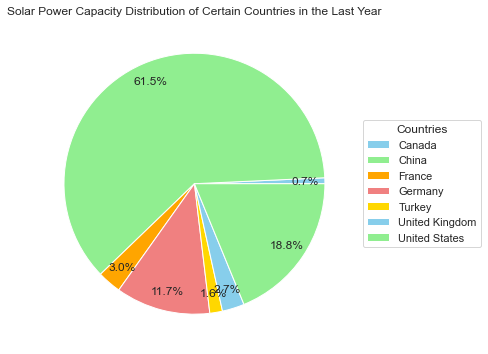

In [64]:
plt.figure(figsize=(10,6))
plt.pie(filtered_data['Solar Capacity'],autopct='%1.1f%%',colors=['skyblue','lightgreen','orange','lightcoral','gold'],pctdistance=0.85)
#plt.xlabel('cuttype')
plt.ylabel("")
plt.legend( filtered_data['Entity'], title="Countries", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Solar Power Capacity Distribution of Certain Countries in the Last Year')
#plt.xticks(rotation=0)
#plt.grid(axis='y',linestyle='--')
plt.show()

In [67]:
# Annual Increase in Solar Power Capacity by Region

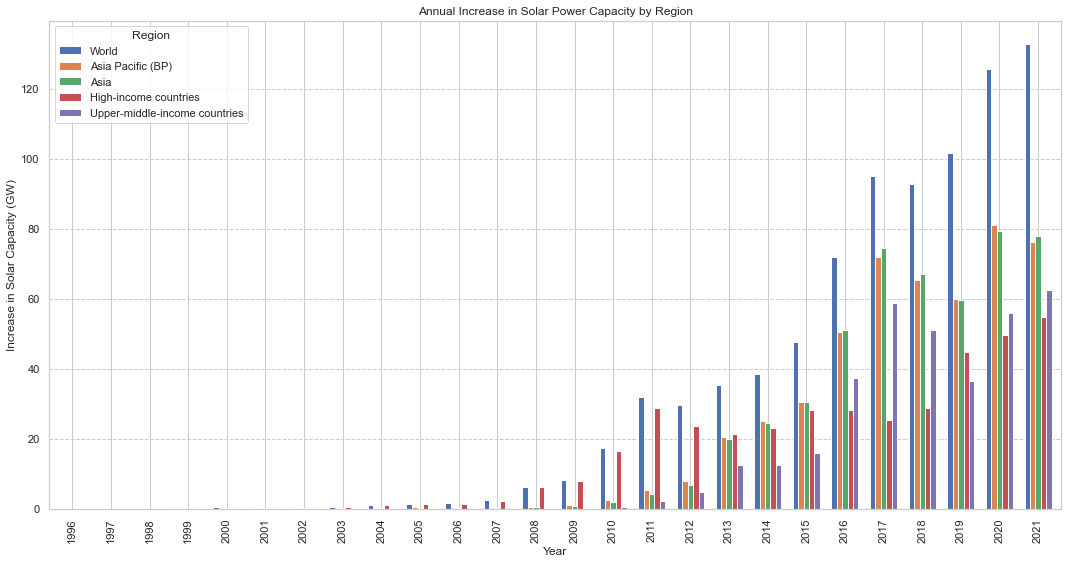

In [66]:
yearly_increase = df.groupby(['Year', 'Entity'])['Solar Capacity'].sum().unstack().fillna(0).diff().fillna(0)

top_entities = yearly_increase.sum(axis=0).sort_values(ascending=False).head(5).index

filtered_yearly_increase = yearly_increase[top_entities]

filtered_yearly_increase.plot(kind='bar', figsize=(15, 8), width=0.7)
plt.title('Annual Increase in Solar Power Capacity by Region')
plt.xlabel('Year')
plt.ylabel('Increase in Solar Capacity (GW)')
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [70]:
# Total Solar Power Production of Specified Countries

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

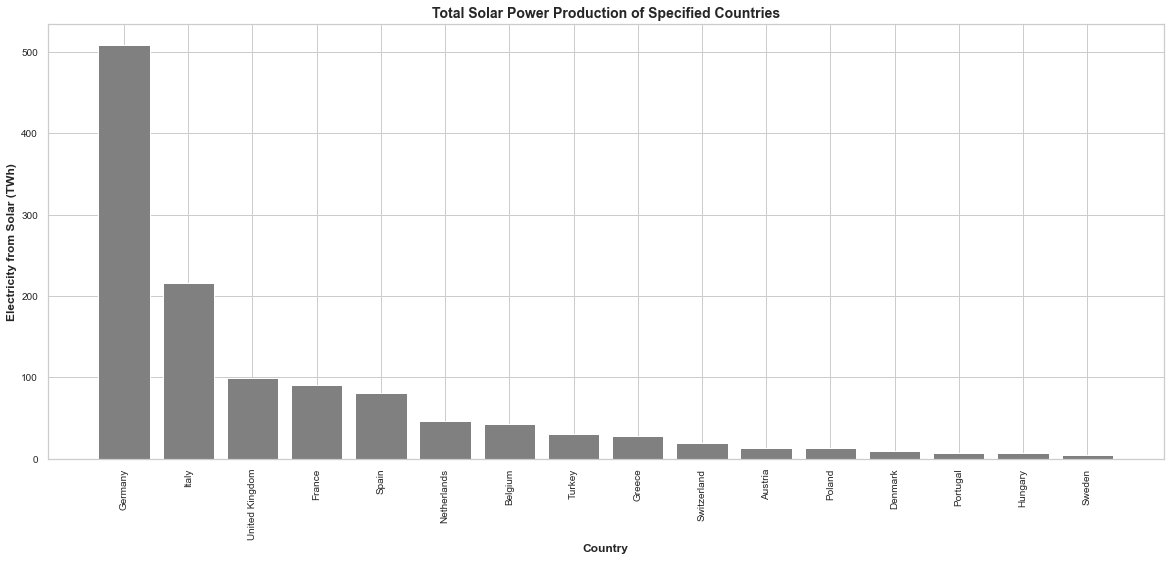

In [69]:
specified_countries = ['Austria', 'Belgium', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 
                      'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

specified_countries_solar_data = df[df['Entity'].isin(specified_countries)]

total_solar_production_specified_countries = specified_countries_solar_data.groupby('Entity')['Solar Capacity'].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
bars = plt.bar(total_solar_production_specified_countries.index, total_solar_production_specified_countries.values, color='grey')
plt.title('Total Solar Power Production of Specified Countries', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Electricity from Solar (TWh)', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

In [73]:
# Comparison of Solar Energy Capacity of Turkey and Neighbouring Countries

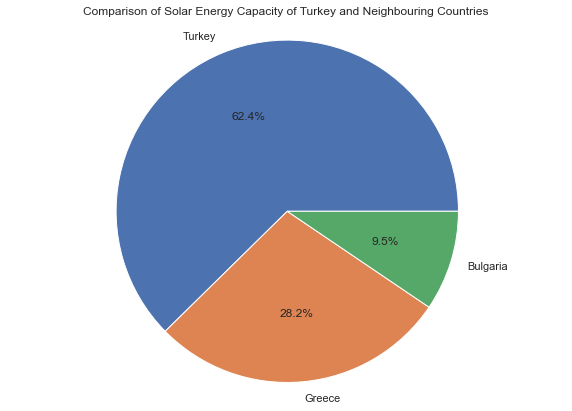

In [72]:
turkey_neighbors = ['Greece', 'Bulgaria', 'Georgia', 'Armenia', 'Iran', 'Azerbaijan', 'Iraq', 'Syria']

neighbors_solar_capacity = df[df['Entity'].isin(turkey_neighbors + ['Turkey']) & (df['Year'] == df['Year'].max())].sort_values(by='Solar Capacity', ascending=False)

plt.figure(figsize=(10, 7))
plt.pie(neighbors_solar_capacity['Solar Capacity'], labels=neighbors_solar_capacity['Entity'], autopct='%1.1f%%', )
plt.title('Comparison of Solar Energy Capacity of Turkey and Neighbouring Countries')
plt.axis('equal')
plt.show()